#### Linear Regression and Polynomial Features on Noisy Cosine Data

In this notebook, we will:

1. Generate a noisy cosine dataset.
2. Apply Linear Regression to the data.
3. Compare Linear Regression with Polynomial Regression to illustrate the need for polynomial features in non-linear data.


**Import Necessary Libraries**


In [306]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [307]:
plt.style.use("seaborn-v0_8-darkgrid")

**Generate the Dataset**


In [308]:
np.random.seed(42)

X = np.linspace(-np.pi, np.pi, 100)
y = np.cos(X) + np.random.normal(0, 0.2, X.shape)

Convert to DataFrame


In [309]:
data = pd.DataFrame({"X": X, "y": y})
data.head()

,X,y
0,-3.141593,-0.900657
1,-3.078126,-1.025640
2,-3.014660,-0.862417
3,-2.951193,-0.677323
4,-2.887727,-1.014779


In [310]:
data.shape

(100, 2)

**Plot the Data**


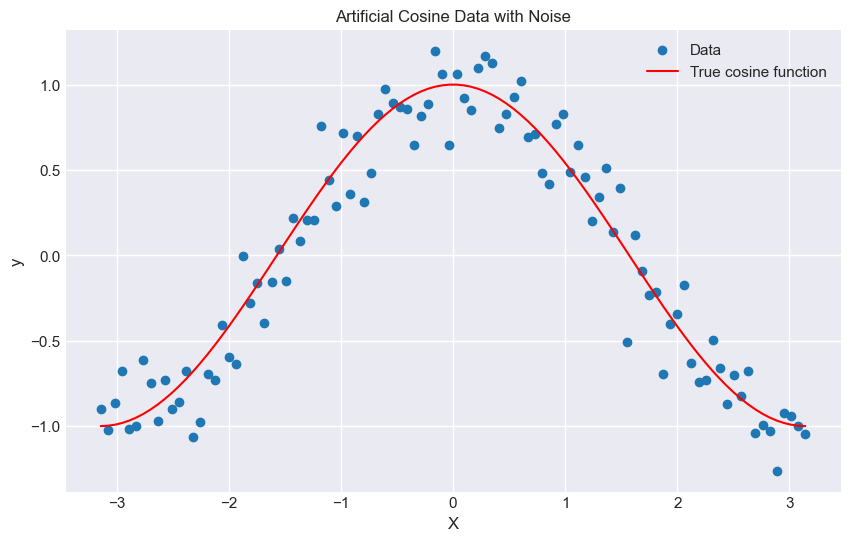

In [311]:
plt.figure(figsize=(10, 6))
plt.scatter(data["X"], data["y"], label="Data")
plt.plot(X, np.cos(X), c="r", label="True cosine function")
plt.title("Artificial Cosine Data with Noise")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

**Fitting Linear Regression**


In [312]:
from sklearn.linear_model import LinearRegression

In [313]:
X = X.reshape(-1, 1)

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

**Making predictions**


In [314]:
y_pred = lin_reg.predict(X)

**Evaluating the model**


In [315]:
from sklearn.metrics import r2_score

In [316]:
r2_lin_reg = r2_score(y, y_pred)
print(f"R² Score for Linear Regression: {r2_lin_reg}")

R² Score for Linear Regression: 0.00012210471314055837


**Plotting Linear Regression Results**


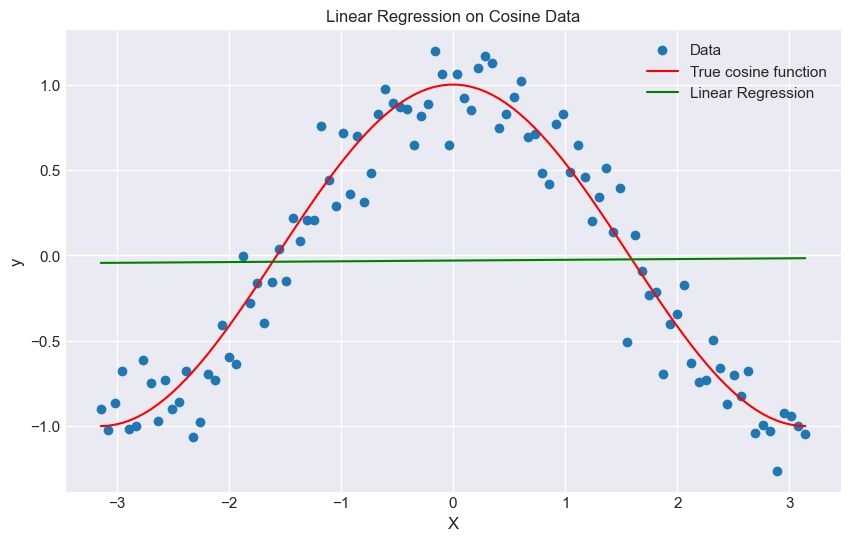

In [317]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label="Data")
plt.plot(X, np.cos(X), c="r", label="True cosine function")
plt.plot(X, y_pred, c="g", label="Linear Regression")

plt.title("Linear Regression on Cosine Data")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

---


**Generate Polynomial Features**


In [318]:
degree = 4
data_poly = data.copy()

In [319]:
for i in range(2, degree + 1):
    data_poly[f"X^{i}"] = data["X"] ** i

In [320]:
X_poly = data_poly.drop("y", axis=1).values

**Fitting Linear Regression with polynomial features**


In [321]:
lin_reg_poly = LinearRegression()
lin_reg_poly.fit(X_poly, y)

LinearRegression()

**Making predictions**


In [322]:
y_pred_poly = lin_reg_poly.predict(X_poly)

**Evaluate the model**


In [323]:
r2_poly_reg = r2_score(y, y_pred_poly)
print(f"R² Score for Polynomial Regression: {r2_poly_reg}")

R² Score for Polynomial Regression: 0.9420691943597865


**Plotting Polynomial Regression Results**

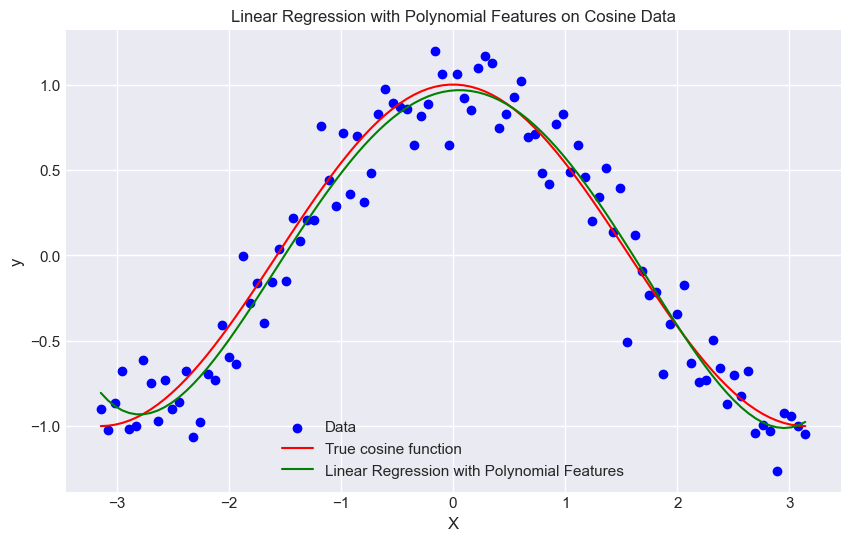

In [324]:
# Plotting the data
plt.figure(figsize=(10, 6))
plt.scatter(X, y, c="b", label="Data")
plt.plot(X, np.cos(X), c="r", label="True cosine function")
plt.plot(X, y_pred_poly, c="g", label="Linear Regression with Polynomial Features")
plt.title("Linear Regression with Polynomial Features on Cosine Data")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

**Summary**

>This notebook demonstrates the importance of using polynomial features when modeling non-linear data. By comparing linear regression and polynomial regression on a noisy cosine dataset, we see that polynomial regression provides a much better fit for the data.
